<a href="https://colab.research.google.com/github/hayhalo/Project-Akhir-Belajar-ML-untuk-Pemula/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Muhammad%20Husni%20Zahran%20Nugrahanto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## 📊 Perkenalan Dataset: Transaksi Keuangan

Dataset diperoleh dari Kaggle yang berjudul ["Bank Transaction Dataset for Fraud Detection"](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data). Dataset ini terdiri dari 16 kolom dengan 2512 observasi yang memberikan wawasan mendalam mengenai perilaku transaksi dan pola aktivitas finansial, sangat cocok untuk eksplorasi deteksi penipuan (*fraud detection*) dan identifikasi anomali.

### 🔑 Fitur Utama:

- **TransactionID**: ID unik alfanumerik untuk setiap transaksi.
- **AccountID**: ID unik untuk setiap akun (satu akun bisa memiliki beberapa transaksi).
- **TransactionAmount**: Nilai uang dari setiap transaksi, mencakup pengeluaran harian hingga pembelian besar.
- **TransactionDate**: Waktu terjadinya transaksi (tanggal dan jam).
- **TransactionType**: Jenis transaksi, dikategorikan sebagai `'Credit'` atau `'Debit'`.
- **Location**: Lokasi geografis transaksi (nama kota di AS).
- **DeviceID**: ID alfanumerik perangkat yang digunakan untuk transaksi.
- **IP Address**: Alamat IPv4 yang terkait dengan transaksi (bisa berubah-ubah).
- **MerchantID**: ID unik merchant, mencerminkan merchant favorit atau outlier.
- **AccountBalance**: Saldo akun setelah transaksi, tergantung pada jenis dan nilai transaksi.
- **PreviousTransactionDate**: Waktu transaksi sebelumnya untuk akun yang sama, berguna untuk menghitung frekuensi transaksi.
- **Channel**: Saluran transaksi (contoh: *Online*, *ATM*, *Branch*).
- **CustomerAge**: Usia pemilik akun, dikelompokkan secara logis berdasarkan pekerjaan.
- **CustomerOccupation**: Pekerjaan pemilik akun (contoh: *Doctor*, *Engineer*, *Student*, *Retired*), mencerminkan pola pendapatan.
- **TransactionDuration**: Durasi transaksi dalam detik, bervariasi tergantung jenis transaksi.
- **LoginAttempts**: Jumlah percobaan login sebelum transaksi—nilai tinggi bisa menjadi indikasi anomali.



# **2. Import Library**

In [604]:
# Manipulasi Data
import pandas as pd
import numpy as np

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pra-pemrosesan Data
from sklearn.preprocessing import RobustScaler

# Clustering dan Evaluasi
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Seleksi Fitur
from sklearn.feature_selection import mutual_info_classif

# reduksi Dimensi
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

In [605]:
df = pd.read_csv("https://raw.githubusercontent.com/hayhalo/Project-Akhir-Belajar-ML-untuk-Pemula/refs/heads/main/Dataset_clustering.csv")

df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [607]:
# Identifikasi Nilai yang Hilang
df.isna().sum()

,0
TransactionID,0
AccountID,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [608]:
# Identifikasi Data yang Terduplikat
print(df.duplicated().sum())

0


In [609]:
# Identifikasi Lokasi yang ada pada Data
set(df.Location)

{'Albuquerque',
 'Atlanta',
 'Austin',
 'Baltimore',
 'Boston',
 'Charlotte',
 'Chicago',
 'Colorado Springs',
 'Columbus',
 'Dallas',
 'Denver',
 'Detroit',
 'El Paso',
 'Fort Worth',
 'Fresno',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'Kansas City',
 'Las Vegas',
 'Los Angeles',
 'Louisville',
 'Memphis',
 'Mesa',
 'Miami',
 'Milwaukee',
 'Nashville',
 'New York',
 'Oklahoma City',
 'Omaha',
 'Philadelphia',
 'Phoenix',
 'Portland',
 'Raleigh',
 'Sacramento',
 'San Antonio',
 'San Diego',
 'San Francisco',
 'San Jose',
 'Seattle',
 'Tucson',
 'Virginia Beach',
 'Washington'}

In [610]:
# Mengubah data menjadi datetime
df[['TransactionDate', 'PreviousTransactionDate']] = df[['TransactionDate', 'PreviousTransactionDate']].apply(pd.to_datetime)

## Statistik Deskriptif

In [611]:
df.describe(include='all')

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,NaN,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,NaN
top,TX002496,AC00460,NaN,NaN,Debit,Fort Worth,D000548,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,NaN
freq,1,12,NaN,NaN,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,NaN
mean,NaN,NaN,297.593778,2023-07-05 20:32:10.826433024,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,2024-11-04 08:09:22.219745024
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,2024-11-04 08:06:23
25%,NaN,NaN,81.885000,2023-04-03 16:22:05.750000128,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,2024-11-04 08:07:53
50%,NaN,NaN,211.140000,2023-07-07 17:49:43.500000,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,2024-11-04 08:09:22
75%,NaN,NaN,414.527500,2023-10-06 18:40:53.500000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,2024-11-04 08:10:53.249999872
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:23


## Bagaimana distribusi jumlah transaksi?

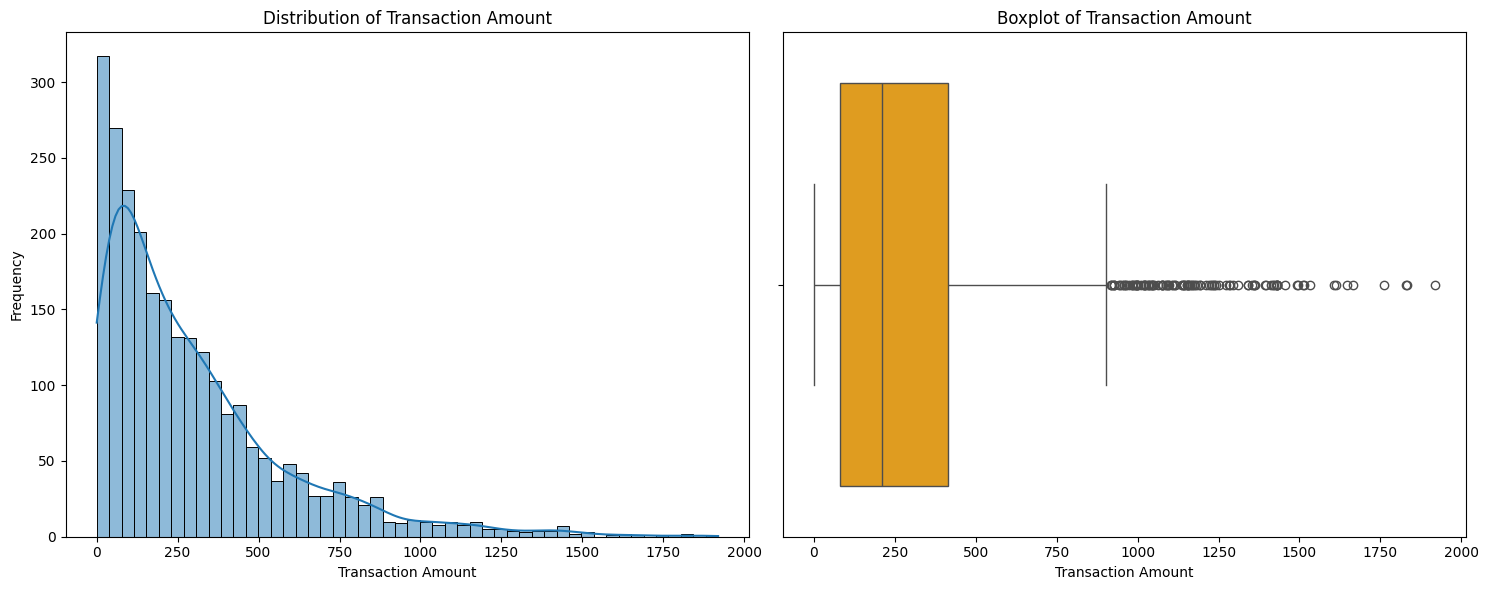

In [612]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['TransactionAmount'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Transaction Amount')
ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('Frequency')

sns.boxplot(x='TransactionAmount', data=df, color='orange', ax=ax[1])
ax[1].set_title('Boxplot of Transaction Amount')
ax[1].set_xlabel('Transaction Amount')

plt.tight_layout()
plt.show()

## Bagaimana distribusi jumlah transaksi untuk masing masing jenis tipe transaksi?

In [613]:
df.groupby('TransactionType').agg({
    'TransactionAmount': ['mean', 'median', 'std', 'min', 'max']
})

TransactionAmount                                   
                             mean  median         std   min      max
TransactionType                                                     
Credit                 306.501004  223.36  290.027618  2.03  1831.02
Debit                  294.991255  205.14  292.527512  0.26  1919.11

<ipython-input-614-039473c766c3>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-614-039473c766c3>:5: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

<ipython-input-614-039473c766c3>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-614-039473c766c3>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




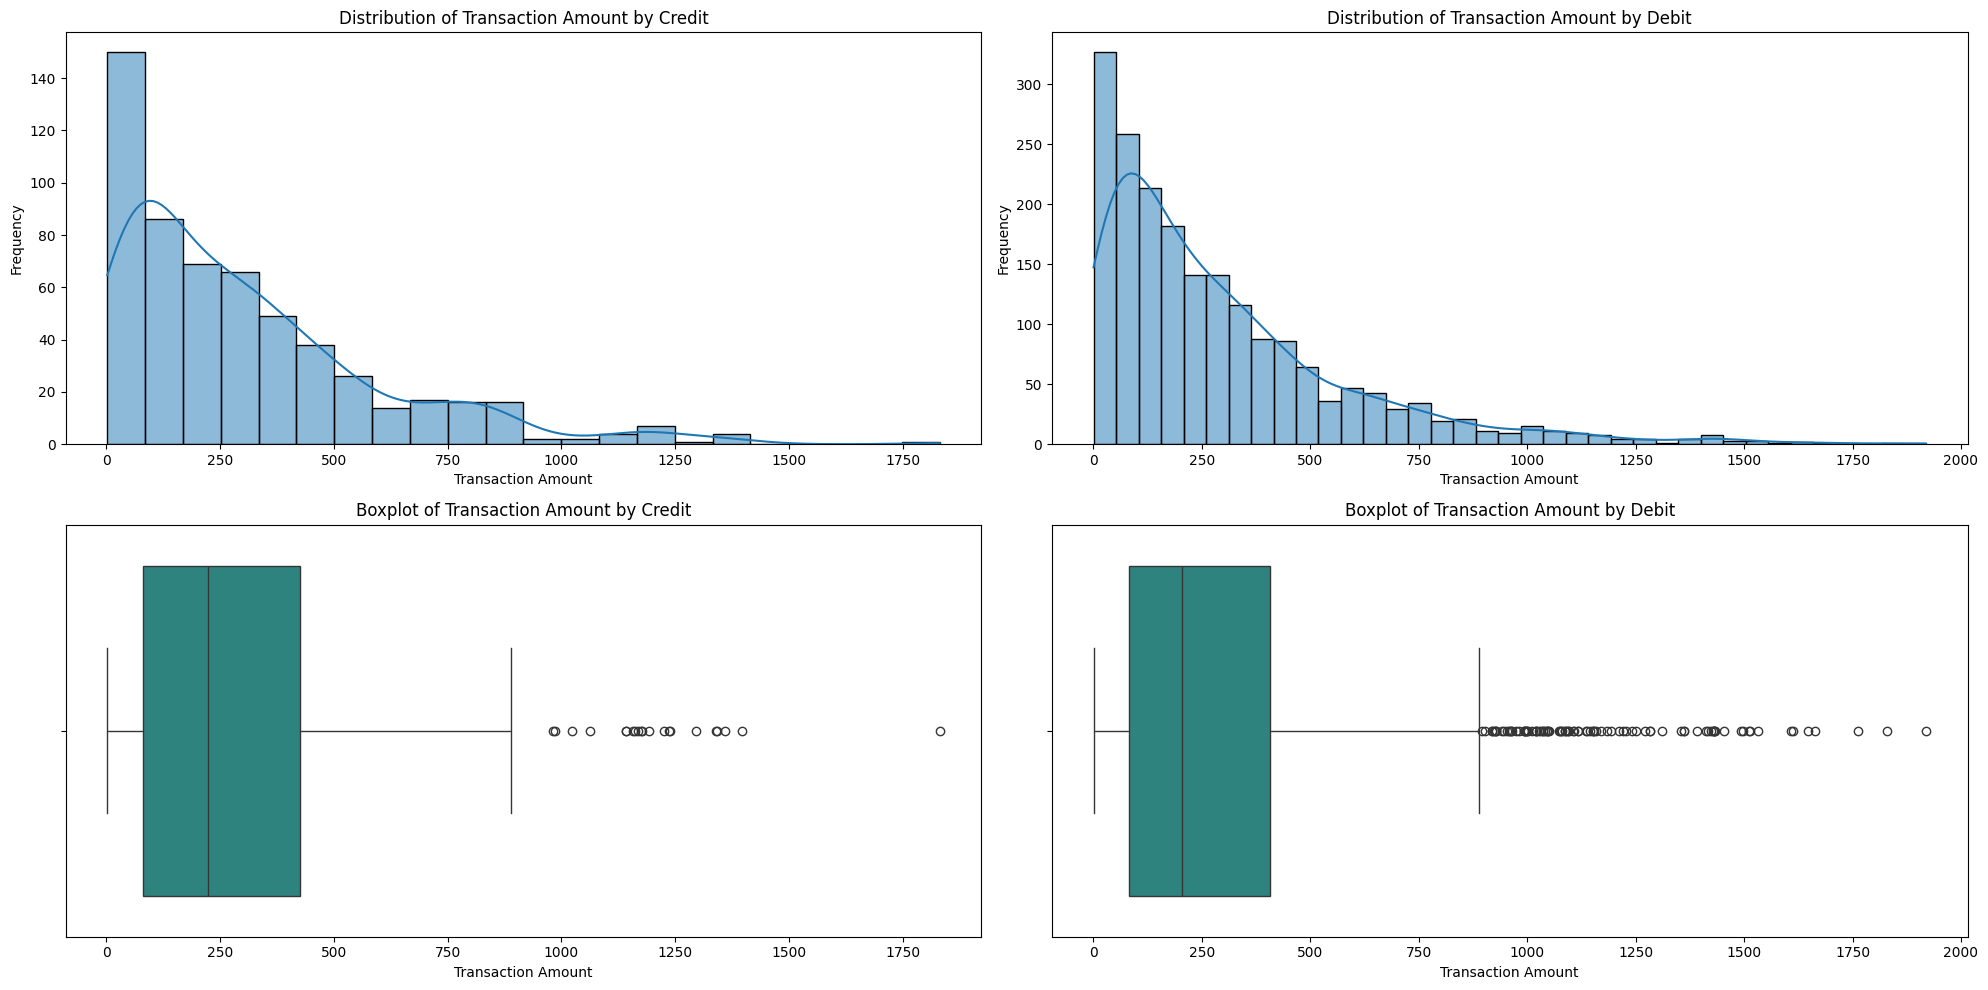

In [614]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
transaction_types = ['Credit', 'Debit']

for i, transaction in enumerate(transaction_types):
    sns.histplot(df['TransactionAmount'][df['TransactionType'] == transaction],
                 palette='viridis', kde=True, ax=ax[0, i])
    ax[0, i].set_title(f'Distribution of Transaction Amount by {transaction}')
    ax[0, i].set_xlabel('Transaction Amount')
    ax[0, i].set_ylabel('Frequency')

for i, transaction in enumerate(transaction_types):
    sns.boxplot(x=df['TransactionAmount'][df['TransactionType'] == transaction],
                palette='viridis', ax=ax[1, i])
    ax[1, i].set_title(f'Boxplot of Transaction Amount by {transaction}')
    ax[1, i].set_xlabel('Transaction Amount')
    ax[1, i].set_ylabel('')

plt.tight_layout()
plt.show()

## Bagaimana rata-rata jumlah transaksi di setiap lokasinya?

In [615]:
df.groupby('Location').agg({
    'TransactionAmount': ['mean', 'median', 'std', 'min', 'max']
})

TransactionAmount                                     
                              mean   median         std    min      max
Location                                                               
Albuquerque             249.124146  146.670  246.915236  10.07  1021.16
Atlanta                 263.151803  135.270  266.462476   1.21  1143.67
Austin                  385.438983  259.490  382.259901   0.84  1397.59
Baltimore               297.146275  206.250  258.798584   2.51  1137.63
Boston                  275.298852  220.200  258.675653   0.32  1087.90
Charlotte               260.039118  185.150  258.679667   3.80  1431.33
Chicago                 270.430333  214.655  223.385172   1.93   830.01
Colorado Springs        339.077167  240.680  331.396127   0.86  1493.00
Columbus                353.318148  226.845  380.136587   6.30  1831.02
Dallas                  222.207959  178.880  199.279591   7.50   896.79
Denver                  252.608710  213.745  218.872661   3.80  1221.65
Detroit                 327.139048  235.400  293.792999   2.03  1162.42
El Paso                 369.511957  285.370  365.914864  12.62  1392.54
Fort Worth              296.810571  240.410  279.776241   3.44  1342.25
Fresno                  223.182500  191.740  183.498325   5.66   820.62
Houston                 308.200794  224.190  286.086579   5.76  1271.90
Indianapolis            284.878793  203.105  256.392359   1.14  1212.51
Jacksonville            341.991167  261.970  289.248775  10.92  1192.20
Kansas City             307.680328  250.010  281.685398   0.45  1176.28
Las Vegas               298.696909  204.630  290.358031   7.31  1225.50
Los Angeles             285.155797  170.190  298.859788   0.99  1612.37
Louisville              264.805882  164.510  341.575375   8.75  1647.74
Memphis                 336.040159  202.110  350.705131   9.83  1762.28
Mesa                    314.158033  251.800  230.028571   8.65   795.31
Miami                   265.144219  168.070  282.907873   3.65  1454.52
Milwaukee               277.002545  198.920  247.991863   7.56   991.82
Nashville               264.227636  201.330  252.660953  18.23  1416.69
New York                304.141897  223.940  312.618564   5.12  1427.71
Oklahoma City           319.353529  226.500  308.722516   0.26  1510.71
Omaha                   283.143846  178.910  285.587258   4.15  1142.83
Philadelphia            290.586866  177.050  311.752132   4.39  1512.99
Phoenix                 346.630182  235.420  356.291110   7.95  1607.55
Portland                338.621667  247.215  376.913694  26.27  1919.11
Raleigh                 289.863898  184.500  284.532112  15.95  1360.67
Sacramento              244.801887  158.560  228.372147   1.41   973.39
San Antonio             327.510678  258.210  360.423144   3.42  1830.00
San Diego               325.803559  183.670  348.890894   2.50  1531.31
San Francisco           295.449825  174.390  319.679513   1.82  1309.79
San Jose                341.150339  307.240  271.768515   3.85  1235.69
Seattle                 236.722787  129.480  241.798520   1.98   997.43
Tucson                  305.369552  214.830  278.376506   5.71  1182.86
Virginia Beach          275.981091  202.490  260.335232  14.26  1173.74
Washington              351.032083  268.045  312.809554   1.87  1422.55

<ipython-input-616-2b05409233ee>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




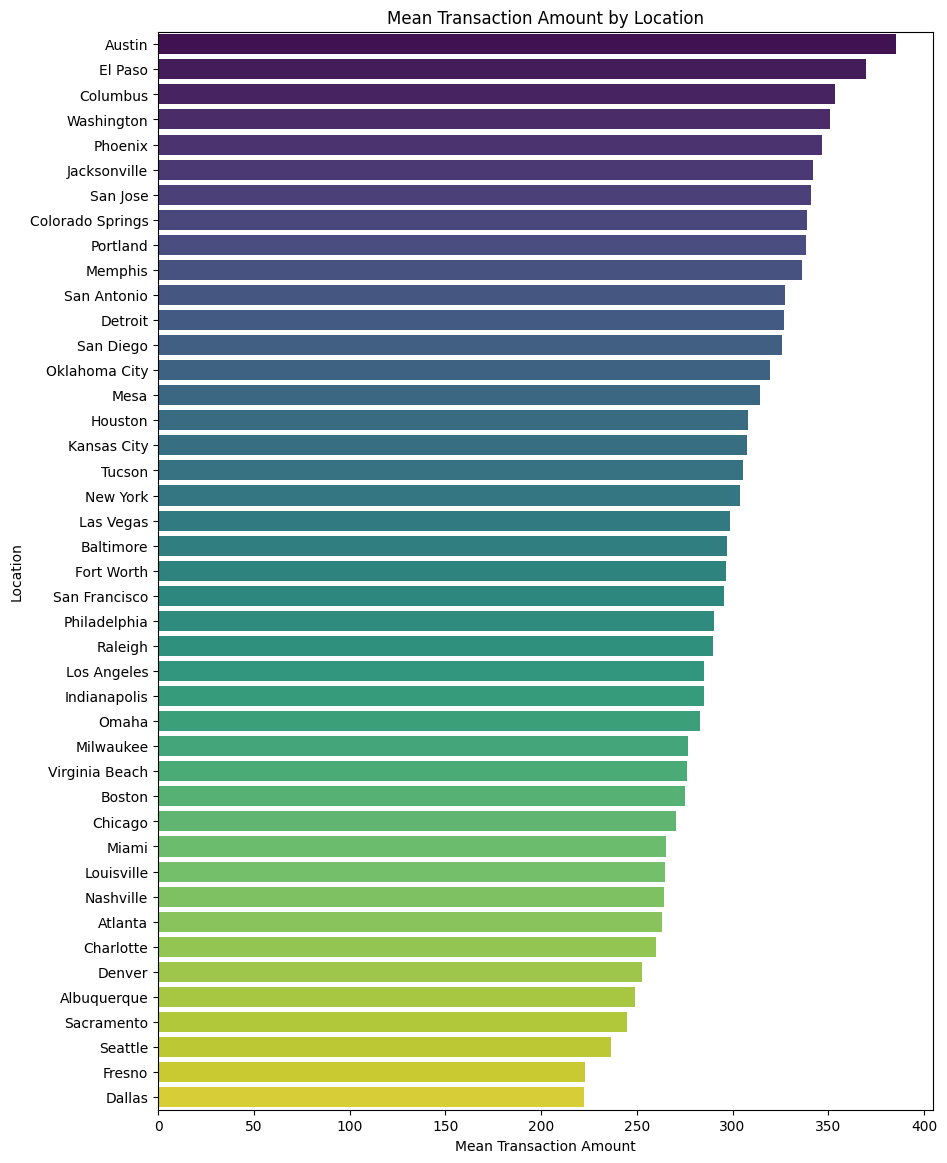

In [616]:
LocationMean = df.groupby('Location')['TransactionAmount'].mean().reset_index()
LocationMean.columns = ['Location', 'MeanTransactionAmount']
LocationMean = LocationMean.sort_values(by='MeanTransactionAmount', ascending=False)

plt.figure(figsize=(10, 14))
sns.barplot(x='MeanTransactionAmount', y='Location', data=LocationMean, palette='viridis')
plt.xlabel('Mean Transaction Amount')
plt.ylabel('Location')
plt.title('Mean Transaction Amount by Location')
plt.show()

## Bagaimana distribsui jumlah transaksi di setiap channelnya?

In [617]:
df.groupby('Channel').agg({
    'TransactionAmount': ['mean', 'median', 'std', 'min', 'max']
})

TransactionAmount                                   
                     mean  median         std   min      max
Channel                                                     
ATM            307.720804  218.96  303.512346  0.32  1919.11
Branch         288.229263  204.16  279.188898  0.45  1664.33
Online         297.214723  206.63  293.203307  0.26  1831.02

<ipython-input-618-9466dc0400ed>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-618-9466dc0400ed>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-618-9466dc0400ed>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




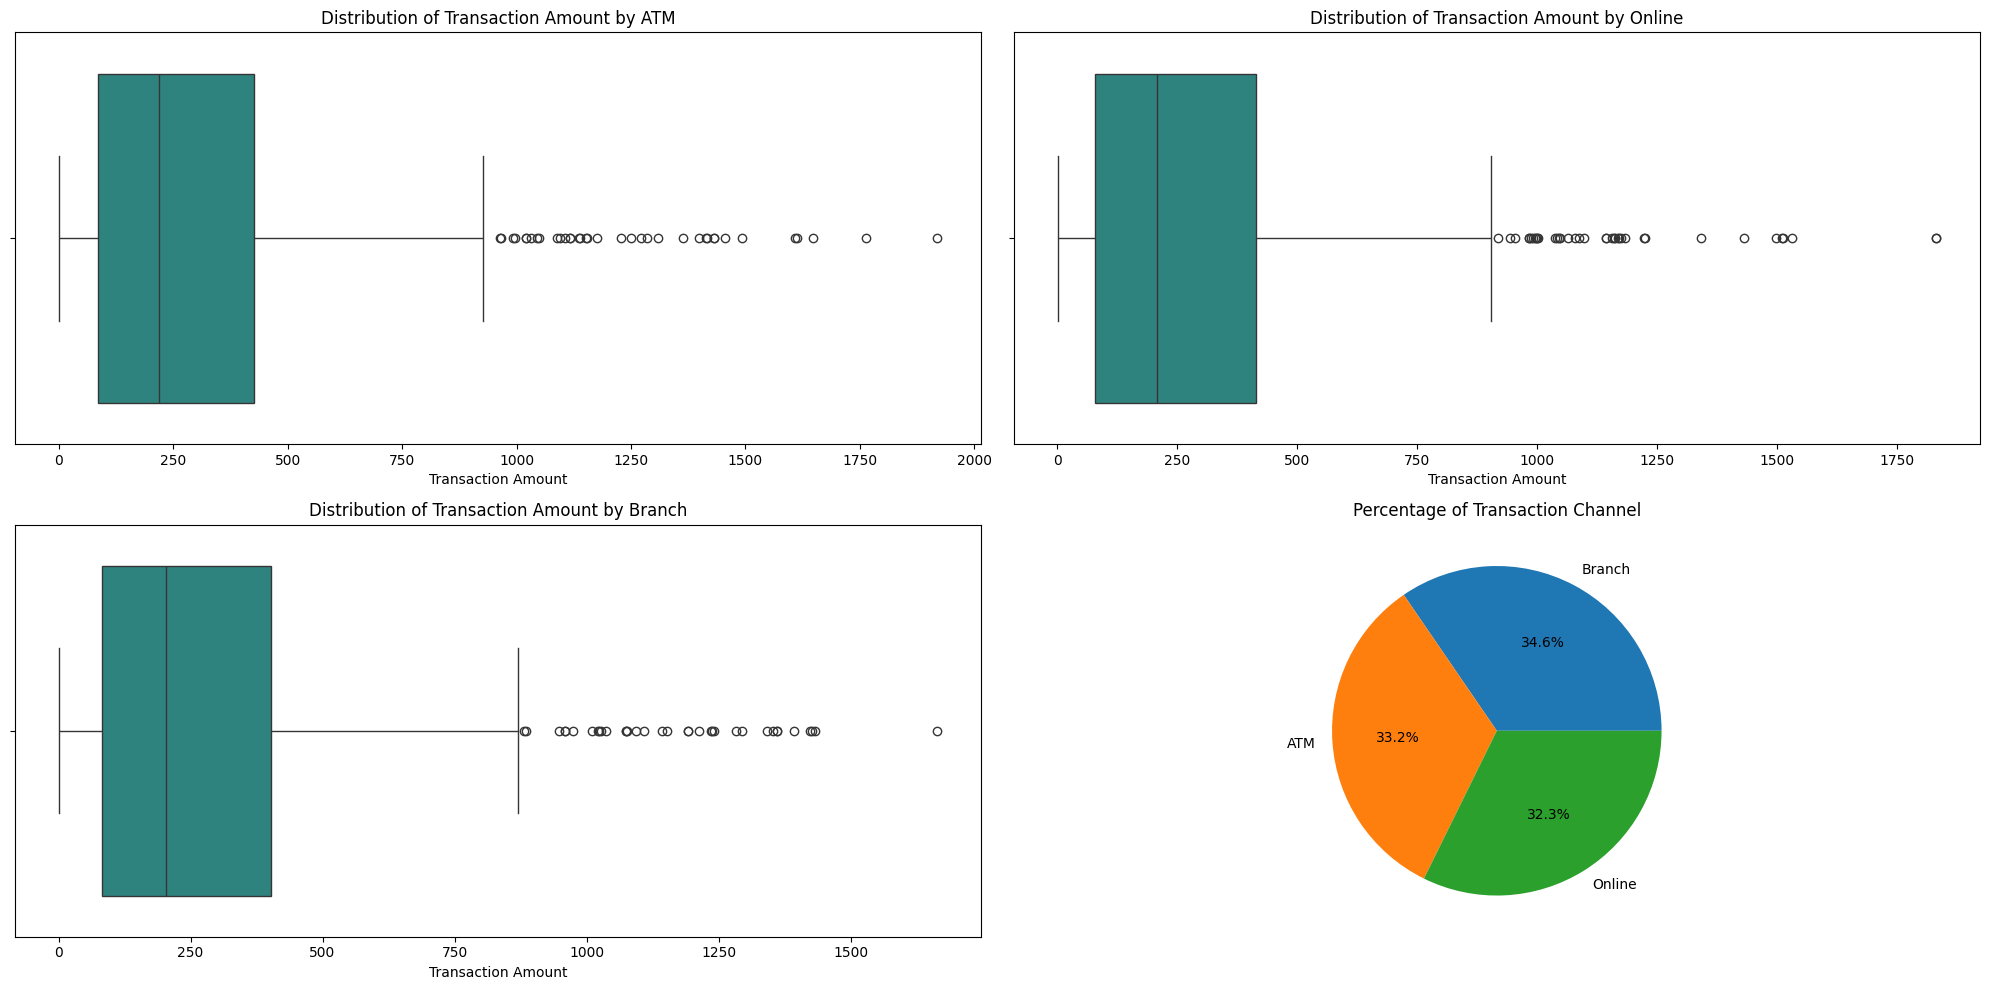

In [618]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
channels = ['ATM', 'Online', 'Branch']

for i, channel in enumerate(channels):
    row, col = divmod(i, 2)
    sns.boxplot(x=df['TransactionAmount'][df['Channel'] == channel],
                palette='viridis', ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of Transaction Amount by {channel}')
    ax[row, col].set_xlabel('Transaction Amount')
    ax[row, col].set_ylabel('')

ax[1, 1].pie(df['Channel'].value_counts(),
             labels=df['Channel'].value_counts().index,
             autopct='%1.1f%%')
ax[1, 1].set_title('Percentage of Transaction Channel')

plt.tight_layout()
plt.show()


## Bagaimana distribusi jumlah transaksi menurut pekerjaan?

In [619]:
df.groupby('CustomerOccupation').agg({
    'TransactionAmount': ['mean', 'median', 'std', 'min', 'max']
})

TransactionAmount                                   
                                mean  median         std   min      max
CustomerOccupation                                                     
Doctor                    292.700174  199.09  292.450174  1.14  1919.11
Engineer                  289.040096  211.36  283.162514  0.32  1830.00
Retired                   294.533673  213.33  286.268759  1.21  1647.74
Student                   313.220746  215.94  304.616874  0.26  1762.28

<ipython-input-620-2a5209ad1c88>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-620-2a5209ad1c88>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-620-2a5209ad1c88>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-620-2a5209ad1c88>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




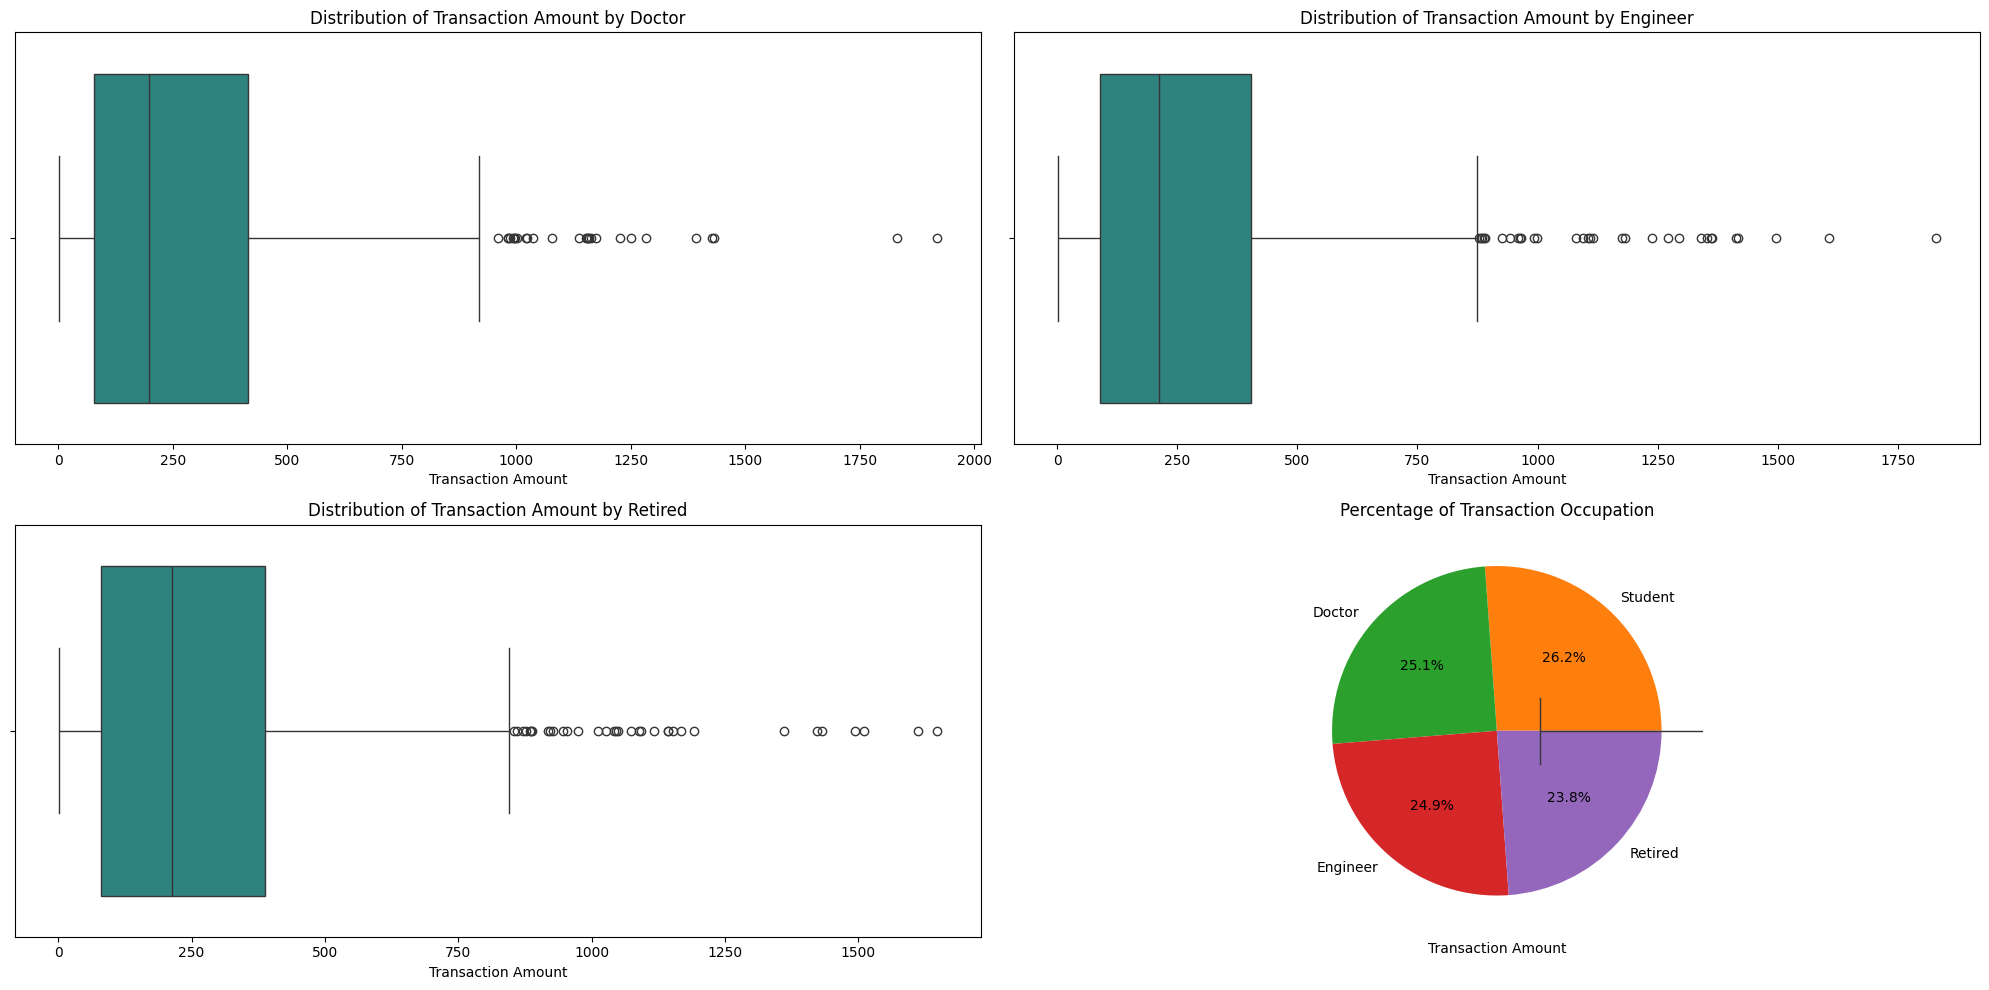

In [620]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
occupations = ['Doctor', 'Engineer', 'Retired', 'Student']

for i, occupation in enumerate(occupations):
    row, col = divmod(i, 2)
    sns.boxplot(x=df['TransactionAmount'][df['CustomerOccupation'] == occupation],
                palette='viridis', ax=ax[row, col])
    ax[row, col].set_title(f'Distribution of Transaction Amount by {occupation}')
    ax[row, col].set_xlabel('Transaction Amount')
    ax[row, col].set_ylabel('')

ax[1, 1].pie(df['CustomerOccupation'].value_counts(),
             labels=df['CustomerOccupation'].value_counts().index,
             autopct='%1.1f%%')
ax[1, 1].set_title('Percentage of Transaction Occupation')

plt.tight_layout()
plt.show()

## Bagaimna frekuensi untuk setiap banyak upaya login untuk melakukan transaksi?

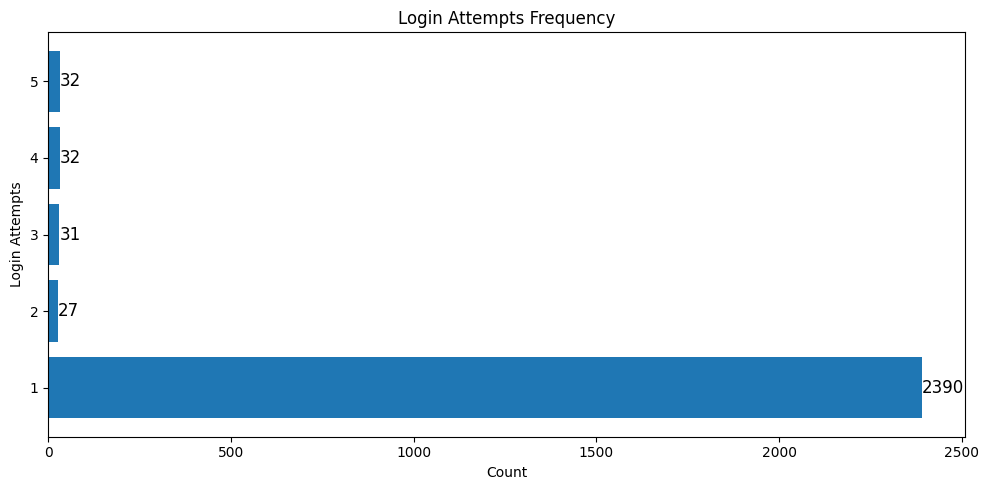

In [621]:
fig, ax_bar = plt.subplots(figsize=(10, 5))
login_counts = df['LoginAttempts'].value_counts()
ax_bar.barh(login_counts.index, login_counts.values)

for i, v in enumerate(login_counts.values):
    ax_bar.text(v + 0.5, login_counts.index[i], str(v), va='center', fontsize=12)

ax_bar.set_title('Login Attempts Frequency')
ax_bar.set_ylabel('Login Attempts')
ax_bar.set_xlabel('Count')

plt.tight_layout()
plt.show()

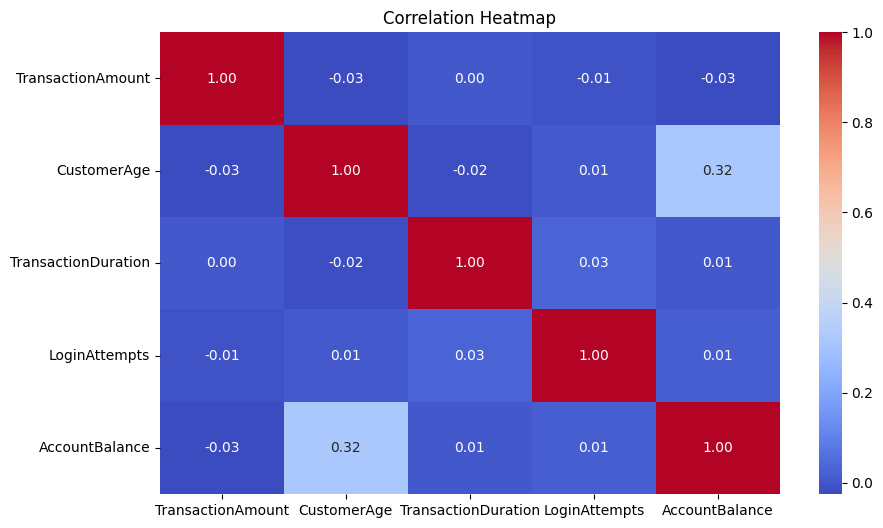

In [622]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt= '.2f')
plt.title('Correlation Heatmap')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [624]:
# Mengekstraksi Fitur
df['TimeTransactionDifference'] = - (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / (3600 * 24)

# Membuat Fitur baru
df['TransactionRate'] = df['TransactionAmount'] / df['AccountBalance']
df['AverageTransaction'] = df['TransactionAmount'] / df['TimeTransactionDifference']

In [625]:
# Memuat Nama Kolom
categorical_features = df.drop(columns=['TransactionID', 'TransactionDate', 'IP Address', 'PreviousTransactionDate']).select_dtypes(include='category').columns.tolist()
numerical_features = df.select_dtypes(include=['number']).columns.tolist()

In [626]:
# scaling variabel numeric
df_scaled = df.copy()
scaler = RobustScaler()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

In [627]:
df_scaled.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction
0,TX000001,AC00128,-0.592378,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.78125,Doctor,-0.321429,0.0,0.061009,2024-11-04 08:08:08,0.467785,-0.368297,-0.573199
1,TX000002,AC00455,0.496329,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.71875,Doctor,0.290816,0.0,1.461410,2024-11-04 08:09:35,0.053975,-0.184103,0.443562
2,TX000003,AC00019,-0.255079,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,-0.81250,Student,-0.576531,0.0,-0.585179,2024-11-04 08:07:04,-0.016233,0.453954,-0.244988
3,TX000004,AC00070,-0.080086,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,-0.59375,Student,-0.892857,0.0,0.620873,2024-11-04 08:09:06,0.338814,-0.227657,-0.141746
4,TX000005,AC00411,-0.594302,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-0.59375,Student,0.872449,0.0,0.436296,2024-11-04 08:06:39,-0.542745,-0.375382,-0.558848


In [628]:
# Count Encodinga Data
count_encd = ['AccountID', 'Location','DeviceID', 'MerchantID', 'CustomerOccupation']
df_scaled_encoded_count = df_scaled.copy()

# Count encoding sederhana + simpan mapping
count_maps = {}
for col in count_encd:
    mapping = df[col].value_counts()
    df_scaled_encoded_count[col] = df[col].map(mapping)
    count_maps[col] = mapping

In [629]:
df_scaled_encoded_count.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction
0,TX000001,7,-0.592378,2023-04-11 16:29:14,Debit,59,6,162.198.218.92,32,ATM,0.78125,631,-0.321429,0.0,0.061009,2024-11-04 08:08:08,0.467785,-0.368297,-0.573199
1,TX000002,7,0.496329,2023-06-27 16:44:19,Debit,63,5,13.149.61.4,27,ATM,0.71875,631,0.290816,0.0,1.461410,2024-11-04 08:09:35,0.053975,-0.184103,0.443562
2,TX000003,4,-0.255079,2023-07-10 18:16:08,Debit,61,5,215.97.143.157,30,Online,-0.81250,657,-0.576531,0.0,-0.585179,2024-11-04 08:07:04,-0.016233,0.453954,-0.244988
3,TX000004,8,-0.080086,2023-05-05 16:32:11,Debit,59,6,200.13.225.150,31,Online,-0.59375,657,-0.892857,0.0,0.620873,2024-11-04 08:09:06,0.338814,-0.227657,-0.141746
4,TX000005,6,-0.594302,2023-10-16 17:51:24,Credit,61,3,65.164.3.100,31,Online,-0.59375,657,0.872449,0.0,0.436296,2024-11-04 08:06:39,-0.542745,-0.375382,-0.558848


In [630]:
# Label Encoding Data
df_scaled_encode = df_scaled_encoded_count.copy()

# Label Encoding untuk Transaction_Type
df_scaled_encode['TransactionType'] = df_scaled_encode['TransactionType'].map({'Credit': 1, 'Debit': 0})

# Label Encoding untuk Transaction_Channel
df_scaled_encode['Channel'] = df_scaled_encode['Channel'].map({'ATM': 0, 'Branch': 1, 'Online': 2})

In [631]:
df_scaled_encode.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction
0,TX000001,7,-0.592378,2023-04-11 16:29:14,0,59,6,162.198.218.92,32,0,0.78125,631,-0.321429,0.0,0.061009,2024-11-04 08:08:08,0.467785,-0.368297,-0.573199
1,TX000002,7,0.496329,2023-06-27 16:44:19,0,63,5,13.149.61.4,27,0,0.71875,631,0.290816,0.0,1.461410,2024-11-04 08:09:35,0.053975,-0.184103,0.443562
2,TX000003,4,-0.255079,2023-07-10 18:16:08,0,61,5,215.97.143.157,30,2,-0.81250,657,-0.576531,0.0,-0.585179,2024-11-04 08:07:04,-0.016233,0.453954,-0.244988
3,TX000004,8,-0.080086,2023-05-05 16:32:11,0,59,6,200.13.225.150,31,2,-0.59375,657,-0.892857,0.0,0.620873,2024-11-04 08:09:06,0.338814,-0.227657,-0.141746
4,TX000005,6,-0.594302,2023-10-16 17:51:24,1,61,3,65.164.3.100,31,2,-0.59375,657,0.872449,0.0,0.436296,2024-11-04 08:06:39,-0.542745,-0.375382,-0.558848


In [632]:
# Menghapus Fitur Identifikasi
df_features = df_scaled_encode.drop(columns=['TransactionID', 'TransactionDate', 'IP Address', 'PreviousTransactionDate'])

In [633]:
df_features.head()

,AccountID,TransactionAmount,TransactionType,Location,DeviceID,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TimeTransactionDifference,TransactionRate,AverageTransaction
0,7,-0.592378,0,59,6,32,0,0.78125,631,-0.321429,0.0,0.061009,0.467785,-0.368297,-0.573199
1,7,0.496329,0,63,5,27,0,0.71875,631,0.290816,0.0,1.461410,0.053975,-0.184103,0.443562
2,4,-0.255079,0,61,5,30,2,-0.81250,657,-0.576531,0.0,-0.585179,-0.016233,0.453954,-0.244988
3,8,-0.080086,0,59,6,31,2,-0.59375,657,-0.892857,0.0,0.620873,0.338814,-0.227657,-0.141746
4,6,-0.594302,1,61,3,31,2,-0.59375,657,0.872449,0.0,0.436296,-0.542745,-0.375382,-0.558848


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

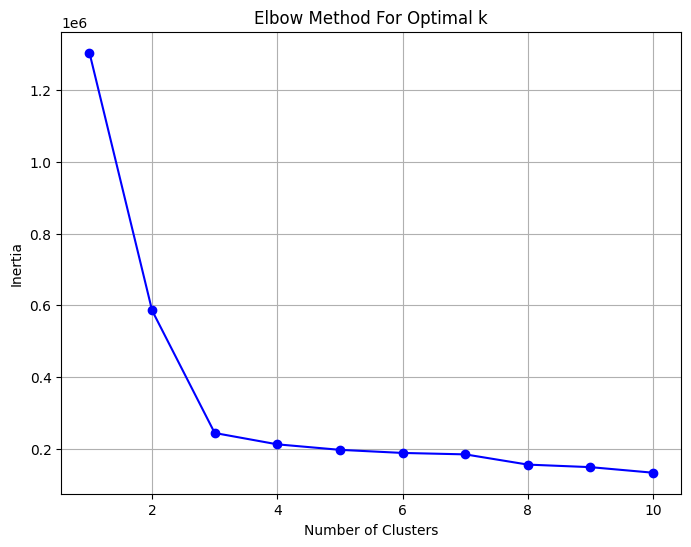

In [634]:
# Clustering dengan Kmeans
inertia = []
max_clusters = 10
for i in range(1, max_clusters + 1):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_features)
  inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid('True')
plt.show()


In [635]:
df_clustered = df_scaled_encode.copy()

# Membuat Cluster dengan K-Means Clustering dengan Nilai K = 3
cluster =  KMeans(n_clusters=3, random_state=42).fit_predict(df_features)
df_clustered['Cluster'] = cluster
df_clustered.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
0,TX000001,7,-0.592378,2023-04-11 16:29:14,0,59,6,162.198.218.92,32,0,0.78125,631,-0.321429,0.0,0.061009,2024-11-04 08:08:08,0.467785,-0.368297,-0.573199,0
1,TX000002,7,0.496329,2023-06-27 16:44:19,0,63,5,13.149.61.4,27,0,0.71875,631,0.290816,0.0,1.461410,2024-11-04 08:09:35,0.053975,-0.184103,0.443562,0
2,TX000003,4,-0.255079,2023-07-10 18:16:08,0,61,5,215.97.143.157,30,2,-0.81250,657,-0.576531,0.0,-0.585179,2024-11-04 08:07:04,-0.016233,0.453954,-0.244988,1
3,TX000004,8,-0.080086,2023-05-05 16:32:11,0,59,6,200.13.225.150,31,2,-0.59375,657,-0.892857,0.0,0.620873,2024-11-04 08:09:06,0.338814,-0.227657,-0.141746,1
4,TX000005,6,-0.594302,2023-10-16 17:51:24,1,61,3,65.164.3.100,31,2,-0.59375,657,0.872449,0.0,0.436296,2024-11-04 08:06:39,-0.542745,-0.375382,-0.558848,1


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [636]:
# Evaluasi Hasil Cluster
silhouette = silhouette_score(df_features, cluster)
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.5910


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [637]:
# Seleksi Fitur dengan MI Score Klasifikasi
mi_score = mutual_info_classif(df_features, cluster)
sorted_mi_score = sorted(dict(zip(df_features.columns, mi_score)).items(), key=lambda x: x[1], reverse=True)
pd.DataFrame(sorted_mi_score)

,0,1
0,CustomerOccupation,1.039984
1,CustomerAge,0.741726
2,AccountBalance,0.411682
3,TransactionRate,0.112132
4,AverageTransaction,0.003010
5,LoginAttempts,0.002062
6,TimeTransactionDifference,0.001892
7,DeviceID,0.001532
8,MerchantID,0.001333
9,AccountID,0.000000


In [638]:
# Memilih 5 Fitur Teratas untuk Clustering
cluster_features = ['CustomerOccupation', 'CustomerAge', 'AccountBalance', 'TransactionRate', 'MerchantID']
df_features_selected = df_features[cluster_features]

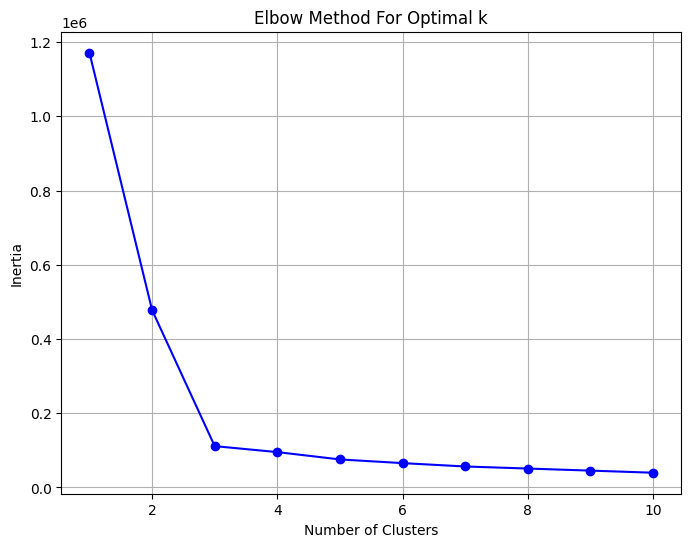

In [639]:
# Menentukan Jumlah Cluster Optimal
inertia = []
max_clusters = 10
for i in range(1, max_clusters + 1):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(df_features_selected)
  inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o', color='b')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid('True')
plt.show()


In [640]:
df_clustered = df_scaled_encode.copy()

# Membuat Cluster dengan K-Means Clustering dengan K = 3 dan Fitur yang Telah Diseleksi
cluster =  KMeans(n_clusters=3, random_state=42).fit_predict(df_features_selected)
df_clustered['Cluster'] = cluster
df_clustered.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
0,TX000001,7,-0.592378,2023-04-11 16:29:14,0,59,6,162.198.218.92,32,0,0.78125,631,-0.321429,0.0,0.061009,2024-11-04 08:08:08,0.467785,-0.368297,-0.573199,0
1,TX000002,7,0.496329,2023-06-27 16:44:19,0,63,5,13.149.61.4,27,0,0.71875,631,0.290816,0.0,1.461410,2024-11-04 08:09:35,0.053975,-0.184103,0.443562,0
2,TX000003,4,-0.255079,2023-07-10 18:16:08,0,61,5,215.97.143.157,30,2,-0.81250,657,-0.576531,0.0,-0.585179,2024-11-04 08:07:04,-0.016233,0.453954,-0.244988,1
3,TX000004,8,-0.080086,2023-05-05 16:32:11,0,59,6,200.13.225.150,31,2,-0.59375,657,-0.892857,0.0,0.620873,2024-11-04 08:09:06,0.338814,-0.227657,-0.141746,1
4,TX000005,6,-0.594302,2023-10-16 17:51:24,1,61,3,65.164.3.100,31,2,-0.59375,657,0.872449,0.0,0.436296,2024-11-04 08:06:39,-0.542745,-0.375382,-0.558848,1


In [641]:
# Evaluasi Hasil Cluster Hasil Seleksi Fitur
silhouette = silhouette_score(df_features_selected, cluster)
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.7412


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [642]:
# PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_features_selected)

# Plotly DataFrame
df_plotly = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
df_plotly['Cluster'] = cluster.astype(str)

# Visualisasi Hasil Cluster
fig = px.scatter_3d(df_plotly, x='PC1', y='PC2', z='PC3', color='Cluster',
                    title='Visualisasi Interaktif 3D Clustering',
                    opacity=0.7, width=800, height=600)
fig.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [643]:
# Inverese Transform Nominal Encoding
df_clustered['TransactionType'] = df_clustered['TransactionType'].map({1: 'Credit', 0: 'Debit'})
df_clustered['Channel'] = df_clustered['Channel'].map({0: 'ATM', 1: 'Branch', 2: 'Online'})

In [644]:
# Inverse Transform Count Encoding
inverse_maps = {col: {v: k for k, v in mapping.items()} for col, mapping in count_maps.items()}

for col in count_encd:
    df_clustered[col] = df_clustered[col].map(inverse_maps[col])

In [645]:
df_clustered.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
0,TX000001,AC00298,-0.592378,2023-04-11 16:29:14,Debit,Austin,D000434,162.198.218.92,M015,ATM,0.78125,Doctor,-0.321429,0.0,0.061009,2024-11-04 08:08:08,0.467785,-0.368297,-0.573199,0
1,TX000002,AC00298,0.496329,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M018,ATM,0.71875,Doctor,0.290816,0.0,1.461410,2024-11-04 08:09:35,0.053975,-0.184103,0.443562,0
2,TX000003,AC00064,-0.255079,2023-07-10 18:16:08,Debit,Atlanta,D000051,215.97.143.157,M088,Online,-0.81250,Student,-0.576531,0.0,-0.585179,2024-11-04 08:07:04,-0.016233,0.453954,-0.244988,1
3,TX000004,AC00136,-0.080086,2023-05-05 16:32:11,Debit,Austin,D000434,200.13.225.150,M091,Online,-0.59375,Student,-0.892857,0.0,0.620873,2024-11-04 08:09:06,0.338814,-0.227657,-0.141746,1
4,TX000005,AC00441,-0.594302,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,-0.59375,Student,0.872449,0.0,0.436296,2024-11-04 08:06:39,-0.542745,-0.375382,-0.558848,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [646]:
# Inverse Transform Fitur Nunmerik
df_clustered[numerical_features] = scaler.inverse_transform(df_clustered[numerical_features])

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [647]:
# Menampilkan statistik deskriptif per cluster
cluster_1 = df_clustered[df_clustered['Cluster'] == 0].describe(include='all')
cluster_2 = df_clustered[df_clustered['Cluster'] == 1].describe(include='all')
cluster_3 = df_clustered[df_clustered['Cluster'] == 2].describe(include='all')

In [648]:
# Cluster 1
print('Cluster 1')
display(cluster_1)

Cluster 1


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
count,1256,1256,1256.000000,1256,1256,1256,1256,1256,1256,1256,1256.000000,1256,1256.000000,1256.000000,1256.000000,1256,1256.000000,1256.000000,1256.000000,1256.0
unique,1256,12,NaN,NaN,2,22,9,529,22,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TX002509,AC00353,NaN,NaN,Debit,Austin,D000579,106.244.1.47,M018,Branch,NaN,Doctor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,228,NaN,NaN,977,155,309,8,154,437,NaN,631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,290.878877,2023-07-05 14:07:27.152070144,NaN,NaN,NaN,NaN,NaN,NaN,46.131369,NaN,120.273089,1.132166,7241.042229,2024-11-04 08:09:21.337579520,487.751322,0.101342,0.627438,0.0
min,NaN,NaN,0.320000,2023-01-02 16:01:26,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,10.000000,1.000000,112.760000,2024-11-04 08:06:23,307.572812,0.000045,0.000699,0.0
25%,NaN,NaN,80.345000,2023-03-31 10:05:19,NaN,NaN,NaN,NaN,NaN,NaN,36.000000,NaN,62.000000,1.000000,4428.555000,2024-11-04 08:07:52,391.607396,0.011733,0.166647,0.0
50%,NaN,NaN,203.985000,2023-07-06 18:01:22,NaN,NaN,NaN,NaN,NaN,NaN,46.000000,NaN,114.500000,1.000000,7308.810000,2024-11-04 08:09:18,486.588843,0.032381,0.431447,0.0
75%,NaN,NaN,409.595000,2023-10-09 17:36:56.500000,NaN,NaN,NaN,NaN,NaN,NaN,56.000000,NaN,162.000000,1.000000,9841.110000,2024-11-04 08:10:53,583.917610,0.071933,0.877851,0.0
max,NaN,NaN,1919.110000,2024-01-01 18:21:50,NaN,NaN,NaN,NaN,NaN,NaN,70.000000,NaN,300.000000,5.000000,14977.990000,2024-11-04 08:12:22,671.672998,4.923221,4.405615,0.0


In [649]:
# Cluster 2
print('Cluster 2')
display(cluster_2)

Cluster 2


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
count,657,657,657.000000,657,657,657,657,657,657,657,657.000000,657,657.000000,657.000000,657.000000,657,657.000000,657.000000,657.000000,657.0
unique,657,12,NaN,NaN,2,22,9,396,22,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TX002512,AC00298,NaN,NaN,Debit,Atlanta,D000579,81.248.235.147,M018,Branch,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,119,NaN,NaN,518,92,140,6,76,224,NaN,657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,313.220746,2023-07-04 16:08:53.532724736,NaN,NaN,NaN,NaN,NaN,NaN,23.068493,NaN,120.652968,1.108067,1570.209985,2024-11-04 08:09:20.219178240,488.666976,0.488620,0.679587,1.0
min,NaN,NaN,0.260000,2023-01-02 16:00:06,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,11.000000,1.000000,101.250000,2024-11-04 08:06:24,310.650903,0.000142,0.000750,1.0
25%,NaN,NaN,88.600000,2023-04-03 16:35:29,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,64.000000,1.000000,587.110000,2024-11-04 08:07:54,395.653588,0.073520,0.192371,1.0
50%,NaN,NaN,215.940000,2023-07-06 18:16:05,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,NaN,114.000000,1.000000,1081.970000,2024-11-04 08:09:21,486.578449,0.201537,0.442030,1.0
75%,NaN,NaN,429.150000,2023-10-05 16:27:27,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,NaN,162.000000,1.000000,1629.120000,2024-11-04 08:10:44,580.647431,0.515028,0.921311,1.0
max,NaN,NaN,1762.280000,2023-12-29 16:32:37,NaN,NaN,NaN,NaN,NaN,NaN,28.000000,NaN,299.000000,5.000000,9963.390000,2024-11-04 08:12:22,671.674398,7.895988,4.465196,1.0


In [650]:
# Cluster 3
print('Cluster 3')
display(cluster_3)

Cluster 3


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeTransactionDifference,TransactionRate,AverageTransaction,Cluster
count,599,599,599.000000,599,599,599,599,599,599,599,599.000000,599,599.000000,599.000000,599.000000,599,599.000000,599.000000,599.000000,599.0
unique,599,12,NaN,NaN,2,22,9,381,22,3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,TX002510,AC00353,NaN,NaN,Debit,Jacksonville,D000579,143.212.47.226,M018,Branch,NaN,Retired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,112,NaN,NaN,449,74,147,6,67,207,NaN,599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,294.533673,2023-07-07 17:07:06.180300544,NaN,NaN,NaN,NaN,NaN,NaN,65.315526,NaN,117.215359,1.126878,4542.157012,2024-11-04 08:09:26.263772928,485.626621,0.090358,0.643392,2.0
min,NaN,NaN,1.210000,2023-01-02 16:07:17,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,NaN,11.000000,1.000000,1006.120000,2024-11-04 08:06:23,307.618056,0.000160,0.002735,2.0
25%,NaN,NaN,79.785000,2023-04-12 17:44:52,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,NaN,64.000000,1.000000,2655.265000,2024-11-04 08:07:53,397.658270,0.019424,0.161823,2.0
50%,NaN,NaN,213.330000,2023-07-12 16:11:30,NaN,NaN,NaN,NaN,NaN,NaN,65.000000,NaN,109.000000,1.000000,4574.430000,2024-11-04 08:09:28,480.665197,0.048623,0.459243,2.0
75%,NaN,NaN,388.375000,2023-10-03 16:19:25,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,158.500000,1.000000,6318.655000,2024-11-04 08:11:03,571.601233,0.109037,0.896009,2.0
max,NaN,NaN,1647.740000,2024-01-01 17:16:23,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,NaN,296.000000,5.000000,7996.700000,2024-11-04 08:12:23,671.666725,1.110457,5.237525,2.0


# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Transactioan Amount:** 290,878877  
- **Transaction Type yang Sering Digunakan:** Debit
- **Location yang Sering Melakukan Transaksi:** Tucson
- **Channel yang Sering Digunakan:** Branch
- **Pekerjaan Nasabah yang Sering Melakukan Transaksi:** Dokter
- **Rata-rata Usia Nasabah:** 46 Tahun  
- **Rata-rata Saldo yang Dimiliki:** 7241,042229
- **Analisis:** Cluster ini mencakup nasabah yang umumnya berada pada usia paruh baya (46 tahun) dengan pekerjaan sebagai dokter, yang cenderung memiliki penghasilan yang relatif stabil dan moderat. Pelanggan di cluster ini lebih banyak melakukan transaksi melalui cabang dan menggunakan kartu debit untuk bertransaksi. Meskipun mereka memiliki saldo rata-rata yang cukup tinggi, mereka lebih cenderung melakukan transaksi dengan jumlah yang relatif besar, yang menunjukkan pola pengeluaran yang terkelola dengan baik. Berdasarkan usia dan pekerjaan, cluster ini mungkin berisi nasabah dengan pengeluaran yang lebih hati-hati dan terencana.

## Cluster 2:
- **Rata-rata Transactioan Amount:** 313,220746  
- **Transaction Type yang Sering Digunakan:** Debit
- **Location yang Sering Melakukan Transaksi:** Los Angles
- **Channel yang Sering Digunakan:** Branch
- **Pekerjaan Nasabah yang Sering Melakukan Transaksi:** Pelajar
- **Rata-rata Usia Nasabah:** 23 Tahun  
- **Rata-rata Saldo yang Dimiliki:** 1570,209985
- **Analisis:** Cluster ini terdiri dari nasabah muda, sebagian besar berusia 23 tahun dan berstatus sebagai pelajar. Pengeluaran mereka relatif tinggi, namun saldo rata-rata yang dimiliki lebih rendah dibandingkan dengan cluster lainnya. Dengan pekerjaan sebagai pelajar, mereka mungkin lebih sering mengakses layanan perbankan melalui cabang untuk transaksi besar, meskipun mereka memiliki jumlah saldo yang terbatas. Penggunaan kartu debit juga menunjukkan bahwa mereka lebih memilih cara transaksi yang praktis dan cepat. Cluster ini lebih cenderung mencerminkan pola transaksi dari nasabah yang berfokus pada kebutuhan pribadi dan pendidikan.

## Cluster 3:
- **Rata-rata Transactioan Amount:** 294,533673
- **Transaction Type yang Sering Digunakan:** Debit
- **Location yang Sering Melakukan Transaksi:** Chicago
- **Channel yang Sering Digunakan:** Baranch
- **Pekerjaan Nasabah yang Sering Melakukan Transaksi:** Pensiunan
- **Rata-rata Usia Nasabah:** 65 Tahun
- **Rata-rata Saldo yang Dimiliki:** 4542,157012
- **Analisis:** Cluster ini mencakup nasabah yang lebih tua (rata-rata usia 65 tahun), dengan status pekerjaan sebagai pensiunan. Walaupun usia yang lebih tua sering kali dikaitkan dengan pengeluaran yang lebih rendah, nasabah dalam cluster ini memiliki jumlah transaksi yang relatif besar dan saldo rata-rata yang lebih tinggi dibandingkan dengan cluster 2. Mereka cenderung menggunakan saluran cabang untuk melakukan transaksi, yang bisa mengindikasikan preferensi mereka terhadap layanan lebih personal dan tatap muka. Pola transaksi ini mungkin menunjukkan bahwa mereka lebih mengelola keuangan mereka untuk kebutuhan jangka panjang atau pengeluaran pensiun, meskipun mereka memiliki saldo yang cukup untuk melakukan transaksi besar.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [651]:
df_clustered.to_csv('Dataset_inisiasi.csv', index=False)